# 1) Delivery_time -> Predict delivery time using sorting time
-Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv(r'D:\Data science\Assignments\Simple Linear Regression\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [21]:
df.rename(columns={'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},inplace=True)
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [19]:
df.duplicated().sum()

0

# coreleation Analysis

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

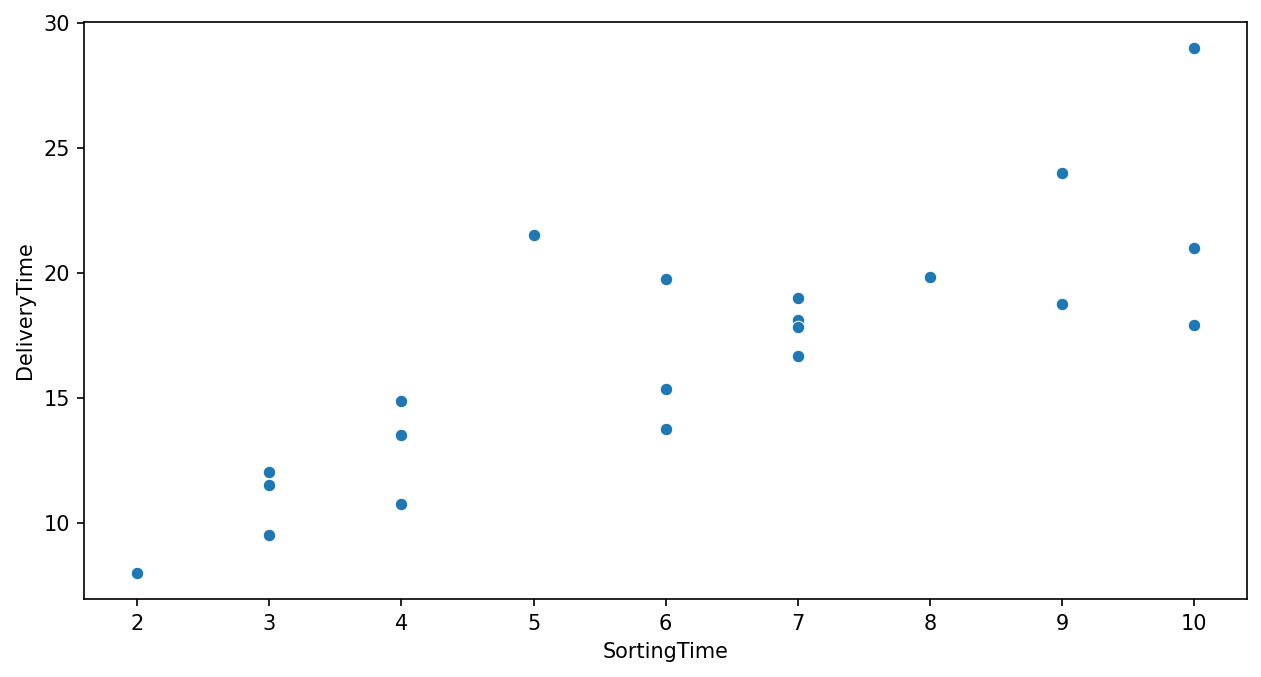

In [22]:
sns.scatterplot(x=df['SortingTime'],y=df['DeliveryTime'])

In [23]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<Axes: >

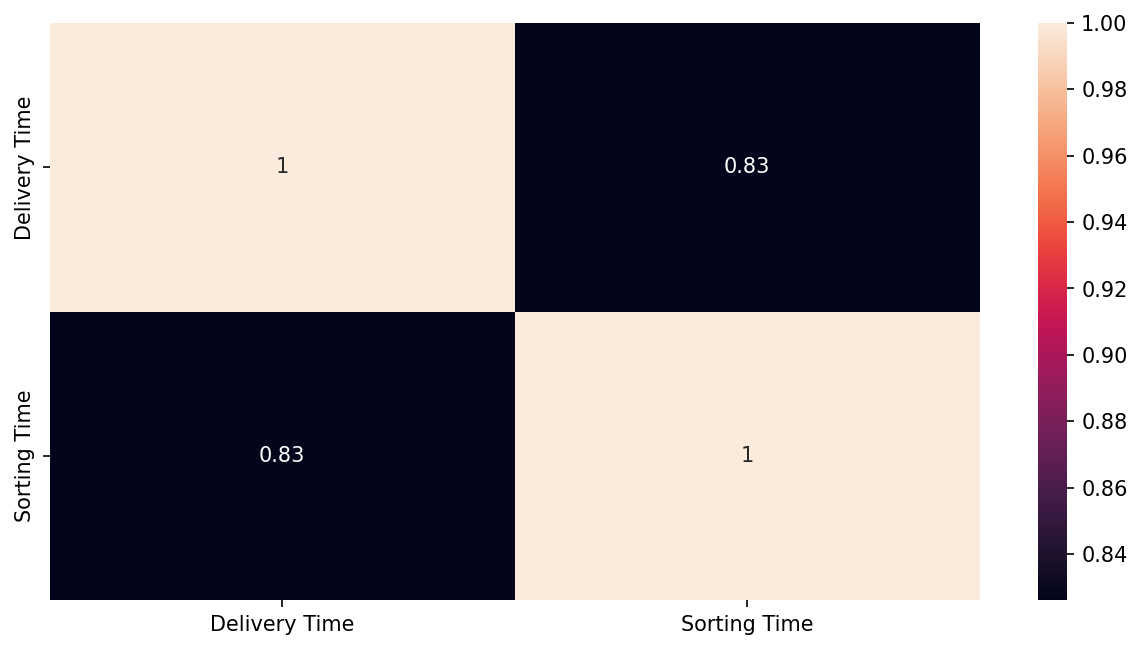

In [10]:
sns.heatmap(df.corr(),annot=True)

# import statsmodel

In [16]:
import statsmodels.formula.api as smf

In [24]:
model = smf.ols('DeliveryTime~SortingTime',data=df).fit()
model

# Model Parameter (slope and Intercept)

In [26]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [32]:
#line equation
Sorting_Time=10
delivery_Time=1.64*Sorting_Time+ 6.582
delivery_Time

22.982

In [28]:
#Print p values
model.pvalues

Intercept      0.001147
SortingTime    0.000004
dtype: float64

In [29]:
#r2 value
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Prediction for new Data

In [31]:
df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [35]:
test = pd.DataFrame({'SortingTime':[1,2,6,9,3]})
test

,SortingTime
0,1
1,2
2,6
3,9
4,3


In [36]:
model.predict(test)

0     8.231754
1     9.880774
2    16.476853
3    21.423913
4    11.529794
dtype: float64